In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#to upload .csv file from local disk
from google.colab import files
files.upload()

Saving petrol_consumption.csv to petrol_consumption.csv


{'petrol_consumption.csv': b'Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption\r\n9.00,3571,1976,0.5250,541\r\n9.00,4092,1250,0.5720,524\r\n9.00,3865,1586,0.5800,561\r\n7.50,4870,2351,0.5290,414\r\n8.00,4399,431,0.5440,410\r\n10.00,5342,1333,0.5710,457\r\n8.00,5319,11868,0.4510,344\r\n8.00,5126,2138,0.5530,467\r\n8.00,4447,8577,0.5290,464\r\n7.00,4512,8507,0.5520,498\r\n8.00,4391,5939,0.5300,580\r\n7.50,5126,14186,0.5250,471\r\n7.00,4817,6930,0.5740,525\r\n7.00,4207,6580,0.5450,508\r\n7.00,4332,8159,0.6080,566\r\n7.00,4318,10340,0.5860,635\r\n7.00,4206,8508,0.5720,603\r\n7.00,3718,4725,0.5400,714\r\n7.00,4716,5915,0.7240,865\r\n8.50,4341,6010,0.6770,640\r\n7.00,4593,7834,0.6630,649\r\n8.00,4983,602,0.6020,540\r\n9.00,4897,2449,0.5110,464\r\n9.00,4258,4686,0.5170,547\r\n8.50,4574,2619,0.5510,460\r\n9.00,3721,4746,0.5440,566\r\n8.00,3448,5399,0.5480,577\r\n7.50,3846,9061,0.5790,631\r\n8.00,4188,5975,0.5630,574\r\n9.00,3601,4650,0.4930,534\r\n7.00,36

In [ ]:
#To load dataset
df=pd.read_csv("petrol_consumption.csv")

In [ ]:
#to show first 5 records
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
#this dataset is a regression problem we want to predict contineous numerical 
#value 

In [ ]:
#to show No. of records
df.shape

(48, 5)

In [ ]:
#check null values
df.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [ ]:
#Separate X and Y from dataset 
#means select input features means X and output means target Y from dataset df
X=df.drop("Petrol_Consumption",axis=1)#all features copy in X apart from Petrol_Consumption
Y=df["Petrol_Consumption"] #target

train test slit means divide the data into 80%-20% from train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
#scaling : apply standardscaler on X_train and X_test formula z_score
X_train.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
11,7.5,5126,14186,0.525
31,7.0,3333,6594,0.513
33,7.5,3357,4121,0.547
27,7.5,3846,9061,0.579
47,7.0,5002,9794,0.593


In [ ]:
#call StandardScaler class
from sklearn.preprocessing import StandardScaler

In [ ]:
#create object of StandardScaler class
ss=StandardScaler()

In [ ]:
X_train=ss.fit_transform(X_train) #fit_tranform() inbuilt method of StandardScaler class
X_test=ss.transform(X_test) #transform() inbuilt method of StandardScaler class

In [ ]:
X_train

array([[-1.32525691e-01,  1.50577399e+00,  2.25854636e+00,
        -9.15791057e-01],
       [-6.28192647e-01, -1.83367022e+00,  2.12333843e-01,
        -1.12852703e+00],
       [-1.32525691e-01, -1.78897047e+00, -4.54194551e-01,
        -5.25775100e-01],
       [-1.32525691e-01, -8.78212954e-01,  8.77245103e-01,
         4.15208375e-02],
       [-6.28192647e-01,  1.27482526e+00,  1.07480487e+00,
         2.89712810e-01],
       [ 1.35447518e+00, -8.42825648e-01, -1.13743332e+00,
         5.92488356e-02],
       [-6.28192647e-01, -4.00925436e-02, -4.64436395e-01,
         8.21552752e-01],
       [-6.28192647e-01,  7.42153173e-01,  2.93282707e-02,
         2.61208055e+00],
       [-6.28192647e-01,  8.82232011e-04,  1.22196399e+00,
         1.65616824e-01],
       [ 3.63141265e-01, -2.41241442e-01,  4.54996025e-02,
        -2.42127131e-01],
       [ 1.35447518e+00,  1.07926383e+00, -9.04835665e-01,
        -1.16398303e+00],
       [-6.28192647e-01, -2.07716626e-01,  7.28199328e-01,
      

In [ ]:
X_test

array([[ 1.35447518, -1.33452296, -0.31161731, -1.48308699],
       [ 0.36314126,  0.15174391, -1.44873146, -0.57895909],
       [ 0.36314126, -1.6194839 , -0.10974518, -0.5080471 ],
       [-0.62819265, -1.26188585,  0.29615525, -1.03988704],
       [ 0.36314126, -2.33654247,  0.19346729,  0.02379284],
       [-0.62819265, -0.78322597,  0.1560037 ,  0.16561682],
       [ 0.36314126, -1.47048471, -0.62291545, -1.58945498],
       [-0.62819265,  0.2448684 , -0.31458205,  0.87473675],
       [ 0.36314126,  1.50577399, -0.98865707, -0.41940711],
       [ 0.36314126,  0.13684399,  0.0357968 , -0.82715107]])

In [ ]:
#create Neural network 
import tensorflow as tf

In [ ]:
#create the object of Sequential class
model=tf.keras.Sequential([
       tf.keras.layers.Dense(3,activation='relu',input_shape=(X.shape[1],)),
       tf.keras.layers.Dense(4,activation='relu'), 
       tf.keras.layers.Dense(1)                  
])

In [ ]:
#to show summary of neural network use inbuilt method summary()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 16        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


Param # total input : 4 it is send into First hidden layer : how many neurons =3 means 43 =12 and bias =3 bias of each newron , total 3 newrons =3 means bias =3 43+bias 12+3=15

2nd hidden layer

3*4+4=12+4=16

3rd output layer = 4*1+1=5

In [ ]:
X.shape[1] #no. of columns in input features

4

In [ ]:
X.shape[0] #no. of records

48

In [ ]:
#complie the model
model.compile(optimizer="sgd", loss="mse")

In [ ]:
#train the model
trained_model = model.fit(X_train, Y_train, epochs=50) 
#epochs means iteration , 1 epochs=1 Forward propagation +1 backward propagation

Epoch 1/50
2/2 [==============================] - 0s 5ms/step - loss: 345646.1979
Epoch 2/50
2/2 [==============================] - 0s 5ms/step - loss: 23503145642.6667
Epoch 3/50
2/2 [==============================] - 0s 2ms/step - loss: 7998100.6667
Epoch 4/50
2/2 [==============================] - 0s 3ms/step - loss: 7399895.0000
Epoch 5/50
2/2 [==============================] - 0s 3ms/step - loss: 6814154.6667
Epoch 6/50
2/2 [==============================] - 0s 4ms/step - loss: 6304362.5000
Epoch 7/50
2/2 [==============================] - 0s 2ms/step - loss: 5797488.1667
Epoch 8/50
2/2 [==============================] - 0s 3ms/step - loss: 5351470.3333
Epoch 9/50
2/2 [==============================] - 0s 3ms/step - loss: 4933732.3333
Epoch 10/50
2/2 [==============================] - 0s 7ms/step - loss: 4523868.6667
Epoch 11/50
2/2 [==============================] - 0s 4ms/step - loss: 4184118.8333
Epoch 12/50
2/2 [==============================] - 0s 4ms/step - loss: 3864918.000

In [ ]:
trained_model.history["loss"]

[346549.09375,
 22121105408.0,
 7975212.5,
 7359395.5,
 6794638.5,
 6270113.0,
 5788740.0,
 5339596.0,
 4926159.5,
 4543178.5,
 4185350.0,
 3859270.0,
 3559800.0,
 3283513.0,
 3031611.0,
 2798827.25,
 2580580.75,
 2379032.75,
 2196919.0,
 2026505.5,
 1870350.5,
 1727202.5,
 1593807.125,
 1468669.875,
 1354389.625,
 1251423.375,
 1155180.375,
 1067096.125,
 984762.4375,
 908913.25,
 840772.0,
 776423.125,
 716807.0625,
 660788.3125,
 610997.375,
 566072.1875,
 522823.09375,
 482942.78125,
 447307.84375,
 412736.40625,
 380229.1875,
 352064.90625,
 325039.03125,
 300829.0,
 278219.59375,
 258552.234375,
 239646.84375,
 221835.46875,
 206076.03125,
 190600.9375]

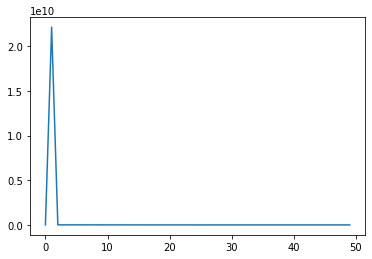

In [ ]:
plt.plot(trained_model.history["loss"]) #visualise loss function in line graph
plt.show()

In [ ]:
#Test the model
Y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,Y_pred)

142977.7058835961

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)  #if relu AF if (-ve) then 0  otherwise

-23.401257779514097

In [ ]:
#Training error find 
Y_pred_training=model.predict(X_train)
mean_squared_error(Y_train,Y_pred_training)

177610.8604149746

In [ ]:
#Testing error find 
Y_pred_test=model.predict(X_test)
mean_squared_error(Y_test,Y_pred_test)

142977.7058835961